# Distribution Analysis and ML Training Script

In [7]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# Read in data
breast_cancer_df = pd.read_csv('diagnosis_data.csv')

In [89]:
# Drop columns with not being used in model training/testing
breast_cancer_df = breast_cancer_df.drop(['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1)

## Distribution Analysis

Mean
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


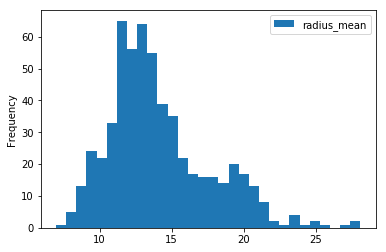

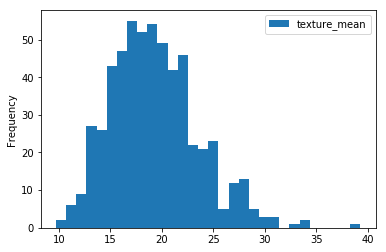

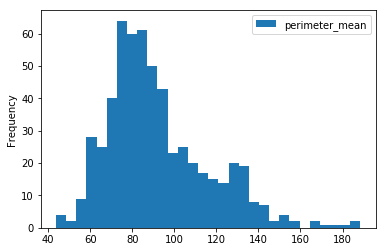

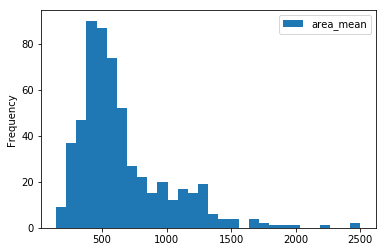

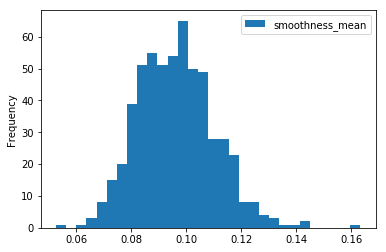

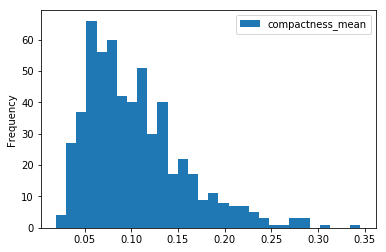

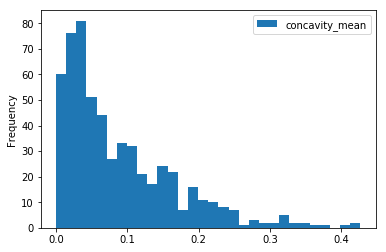

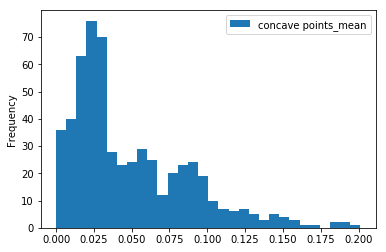

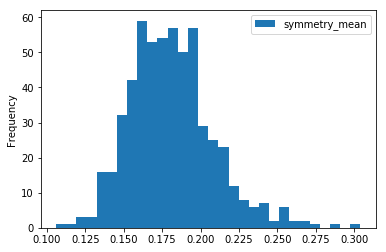

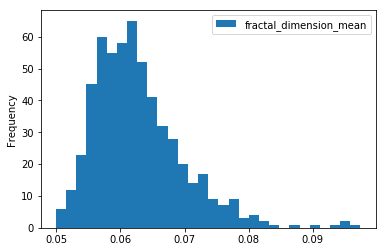

In [10]:
print("Mean")
print(breast_cancer_df[['radius_mean']].plot.hist(bins=30))
print(breast_cancer_df[['texture_mean']].plot.hist(bins=30))
print(breast_cancer_df[['perimeter_mean']].plot.hist(bins=30))
print(breast_cancer_df[['area_mean']].plot.hist(bins=30))
print(breast_cancer_df[['smoothness_mean']].plot.hist(bins=30))
print(breast_cancer_df[['compactness_mean']].plot.hist(bins=30))
print(breast_cancer_df[['concavity_mean']].plot.hist(bins=30))
print(breast_cancer_df[['concave points_mean']].plot.hist(bins=30))
print(breast_cancer_df[['symmetry_mean']].plot.hist(bins=30))
print(breast_cancer_df[['fractal_dimension_mean']].plot.hist(bins=30))

All Gaussian distribution, some with a right skew.

In [90]:
# Import needed libraries
import pandas as pd
import numpy as np
import csv

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Prepare dataset to sample from
breast_cancer_df = pd.read_csv('diagnosis_data.csv')
breast_cancer_df = breast_cancer_df.drop(['id', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1)

# All values are used for training, since model with the above parameters is assumed to be tested
X = breast_cancer_df.drop('diagnosis', axis=1)  
Y = breast_cancer_df['diagnosis']

# Gini index for splitting
clf = DecisionTreeClassifier(splitter="random", max_depth=2, max_features=6,
                             random_state=0, class_weight="balanced")

# Train
clf.fit(X, Y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='random')

In [91]:
# Function to create random dummy file for presentation
def dummy_breast_cancer(n_rows):
    
    # Get distributions of features
    mu = breast_cancer_df.mean()
    sigma = breast_cancer_df.std()
    
    # Create CSV file
    with open("../dummy_test.csv", "w") as dummy:
        fieldnames = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                      'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
                      'fractal_dimension_mean']
        writer = csv.DictWriter(dummy, fieldnames=fieldnames)
        writer.writeheader()
        
        # How many rows should be in dummy CSV file
        for x in range(n_rows):
            # Sample from feature distributions
            features = np.random.normal(mu, sigma).tolist()
            
            # Turn negative values to zero
            features = [0 if i < 0 else i for i in features]
            
            # Get label value
            predict = clf.predict([features])
            
            # Write row
            writer.writerow({'diagnosis': predict[0], 'radius_mean': features[0], 'texture_mean': features[1], 
                             'perimeter_mean': features[2], 'area_mean': features[3], 'smoothness_mean': features[4], 
                             'compactness_mean': features[5], 'concavity_mean' : features[6], 
                             'concave points_mean': features[7], 'symmetry_mean': features[8], 
                             'fractal_dimension_mean': features[9]})
        
# Call function
dummy_breast_cancer(10)

## ML Training

In [4]:
# This revalues M and Bs to 1 and 0s
for i in range(len(breast_cancer_df)):
    if breast_cancer_df.iloc[i, 0] == "M":
        breast_cancer_df.iloc[i, 0] = 1
    else:
        breast_cancer_df.iloc[i, 0] = 0

Get a summary on the current dataset.

In [36]:
# Get (rows, columns)
print(breast_cancer_df.shape)

# First five rows
breast_cancer_df.head(20)

(569, 11)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243


After dropping the unwanted columns, we need to check if any values are missing or encoded differently to indicate a missing value.

In [6]:
# All rows of all columns contain real numbers
print(breast_cancer_df.isnull().values.any())

breast_cancer_df.applymap(np.isreal).all()

False


diagnosis                 True
radius_mean               True
texture_mean              True
perimeter_mean            True
area_mean                 True
smoothness_mean           True
compactness_mean          True
concavity_mean            True
concave points_mean       True
symmetry_mean             True
fractal_dimension_mean    True
dtype: bool

The values in the columns are good! Now to the model training, first load the libraries needed.

In [5]:
# Libraries for model training and testing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Model accuracy
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Model plotting
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus

Give the model a quick test run before improving.

In [25]:
# Predictor columns for X, truth labels for Y
X = breast_cancer_df.drop('diagnosis', axis=1)  
Y = breast_cancer_df['diagnosis']  

# If 1s and 0s are being used for training
# Need them for roc_auc curve only
Y = Y.astype('int')


# Create train/test split
# stratify = Y --> explained in link, samples from each class so train/test sets are proportional in classes
#    it really seems to reduce precision for the M class quite a bit
# https://stackoverflow.com/questions/29082001/how-to-split-a-dataset-into-training-and-validation-set-keeping-ratio-between-cl
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 0, stratify = Y)

In [52]:
# Feature selection
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
    
# Train
clf.fit(X_train, y_train)

# Evaluates the most important features of the classification tree
# Concave points_mean seems to be the most important feature
print(clf.feature_importances_)

[ 0.0998047   0.04151795  0.11766621  0.11720743  0.03945648  0.07717344
  0.1881806   0.29000404  0.01518094  0.01380821]


In [10]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [7]:
# Drop the least important features
X = X.drop(['texture_mean', 'smoothness_mean', 'compactness_mean', 
             'symmetry_mean', 'fractal_dimension_mean'], axis=1)

# Recreate training and test sets
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 0, stratify = Y)

#### Model training

In [20]:
# Model to train
clf = DecisionTreeClassifier(criterion = "gini", splitter = "random",  max_depth = 2, max_features = 3, 
                                    random_state = 0, class_weight = "balanced")


# Train
clf.fit(X_train, y_train)

# Get predictions
x_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)

# Accuracy measures
print("Model:")
print('DecisionTreeClassifier(criterion = "gini", splitter = "random",  max_depth = 2, max_features = 3, \nrandom_state = 0, class_weight = "balanced")')

print("\n\nfeature_importances_:")
print(clf.feature_importances_)

print("\n Accuracy:")
print(accuracy_score(y_test,y_pred)*100)
print("\n Confusion matrix:")
print(confusion_matrix(y_test, y_pred))  
print("\n Confusion matrix report:")
print(classification_report(y_test, y_pred))

print("\n Training accuracy:")
print(accuracy_score(y_train,x_train_pred)*100)
print("\n Testing accuracy:")
print(accuracy_score(y_test,y_pred)*100)

kfolds = cross_val_score(clf, X, Y, cv=10)
print("\n\n k-fold accuracy with ten folds:")
print(kfolds.mean())

Model:
DecisionTreeClassifier(criterion = "gini", splitter = "random",  max_depth = 2, max_features = 3, 
random_state = 0, class_weight = "balanced")


feature_importances_:
[ 0.00841918  0.          0.08878844  0.          0.90279238]

 Accuracy:
90.6432748538

 Confusion matrix:
[[98  9]
 [ 7 57]]

 Confusion matrix report:
             precision    recall  f1-score   support

          0       0.93      0.92      0.92       107
          1       0.86      0.89      0.88        64

avg / total       0.91      0.91      0.91       171


 Training accuracy:
91.7085427136

 Testing accuracy:
90.6432748538


 k-fold accuracy with ten folds:
0.917713464696


In [10]:
# Compare training accuracy to testing accuracy
print(accuracy_score(y_train,x_train_pred)*100)
print(accuracy_score(y_test,y_pred)*100)

91.7085427136
90.6432748538


Use Kfolds to get accurate idea for model performance.

In [11]:
# Kfolds array to average score to get true idea for model performance for model with slightly different parameters
kfolds = cross_val_score(clf, X, Y, cv=10)
print(kfolds.mean())

0.917713464696


GridSearch is one way to find the best parameters for our model quickly.

Source: https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

About random_state:

https://stackoverflow.com/questions/39158003/confused-about-random-state-in-decision-tree-of-scikit-learn

In [46]:
from sklearn.metrics import average_precision_score, precision_score

In [26]:
# All combinations of these parameters will be tried out
# So n_total = n_criterion * n_max_depth * ...
grid_param = {  
    'criterion' : ["gini", "entropy"],
    'splitter' : ["best", "random"],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split' : [0.1, 0.2, 0.3, 0.4],
    'min_samples_leaf' : [0.1, 0.2, 0.3, 0.4],
    'max_features' : [3, 4, 5, 6, 7, 8, 9, 10],
    'class_weight' : ["balanced", None]
}

# Code in the values you want to remain static, like the random_state
classifier = DecisionTreeClassifier(random_state=0)

# For scoring use accuracy, f1, roc_auc
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# cv is the number of kfold cross validations, executions = n_total * cv
gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=grid_param,
                     scoring='precision',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)  

# Get parameters that gave the best accuracy
best_parameters = gd_sr.best_params_  
print(best_parameters) 

# Get the best accuracy achieved
best_result = gd_sr.best_score_  
print(best_result)  

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'splitter': 'random'}
0.940512559251


This stuff is for visualization when we get there.

In [63]:
#https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft
# conda install graphviz <-- Step I took that may make plotting possible

# Get the dot file data to turn into image
dot_data = tree.export_graphviz(clf_gini, 
                     out_file=None, 
                     feature_names=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
                     class_names=['Malignant (spreading)', 'Benign (not spreading)'],
                     filled=True, 
                     rounded=True)

# pydotplus is a Python Interface to Graphviz’s Dot language
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png()) #--> Display image
graph.write_png("test_tree.png") #--> Save image to a file, in same directory as notebook


#=====================================
# May be of use
pngfile = filename + ".png"

with open(dotfile, 'w') as f:
    export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

command = ["dot", "-Tpng", dotfile, "-o", pngfile]
try:
    subprocess.check_call(command)
except:
    exit("Could not run dot, ie graphviz, "
             "to produce visualization")

True